<a href="https://colab.research.google.com/github/danielsanchez0/parcialInteligentes/blob/main/parcialInteligentes_DanielSanchez_CamiloVargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Camilo Vargas Quintero
*   Daniel Fernando Sanchez Ortiz

# Carga y limpieza de datos

In [283]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
# Import Naivebayes
from sklearn.naive_bayes import GaussianNB
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

#
from sklearn.preprocessing import LabelEncoder

#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# para validación cruzada
from sklearn.model_selection import cross_val_score
# Maquinas
from sklearn.svm import SVC
#Regresión lineal
from sklearn.linear_model import LinearRegression

cargar datos

In [284]:
df = pd.read_csv('/content/MI.csv',sep='[;]',
                 engine='python')

verificar datos nulos

In [285]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Length: 1700, dtype: int64

reemplazar valores ?

In [286]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum(axis=1)

0        9
1        3
2        3
3        9
4        3
        ..
1695    12
1696    20
1697    38
1698    15
1699    25
Length: 1700, dtype: int64

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, id to let_is
dtypes: int64(14), object(110)
memory usage: 1.6+ MB


convertir valores object a numeric

In [288]:
for columna in df.columns:
    if df[columna].dtype == 'object':
        df[columna] = pd.to_numeric(df[columna], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, id to let_is
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


**completar valores**

In [289]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Length: 1700, dtype: int64

analisis estadistico

In [290]:
df.describe()

,id,age,sex,inf_anam,stenok_an,fk_stenok,ibs_post,ibs_nasl,GB,sim_gipert,...,jelud_tah,fibr_jelud,a_v_blok,otek_lanc,razriv,dressler,zsn,rec_im,p_im_sten,let_is
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.375000,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.233395,0.483883,0.835816,2.363227,1.018208,0.789280,0.099661,1.085916,0.180053,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.375000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.375000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,0.375000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


verificar distribuccion de normalidad

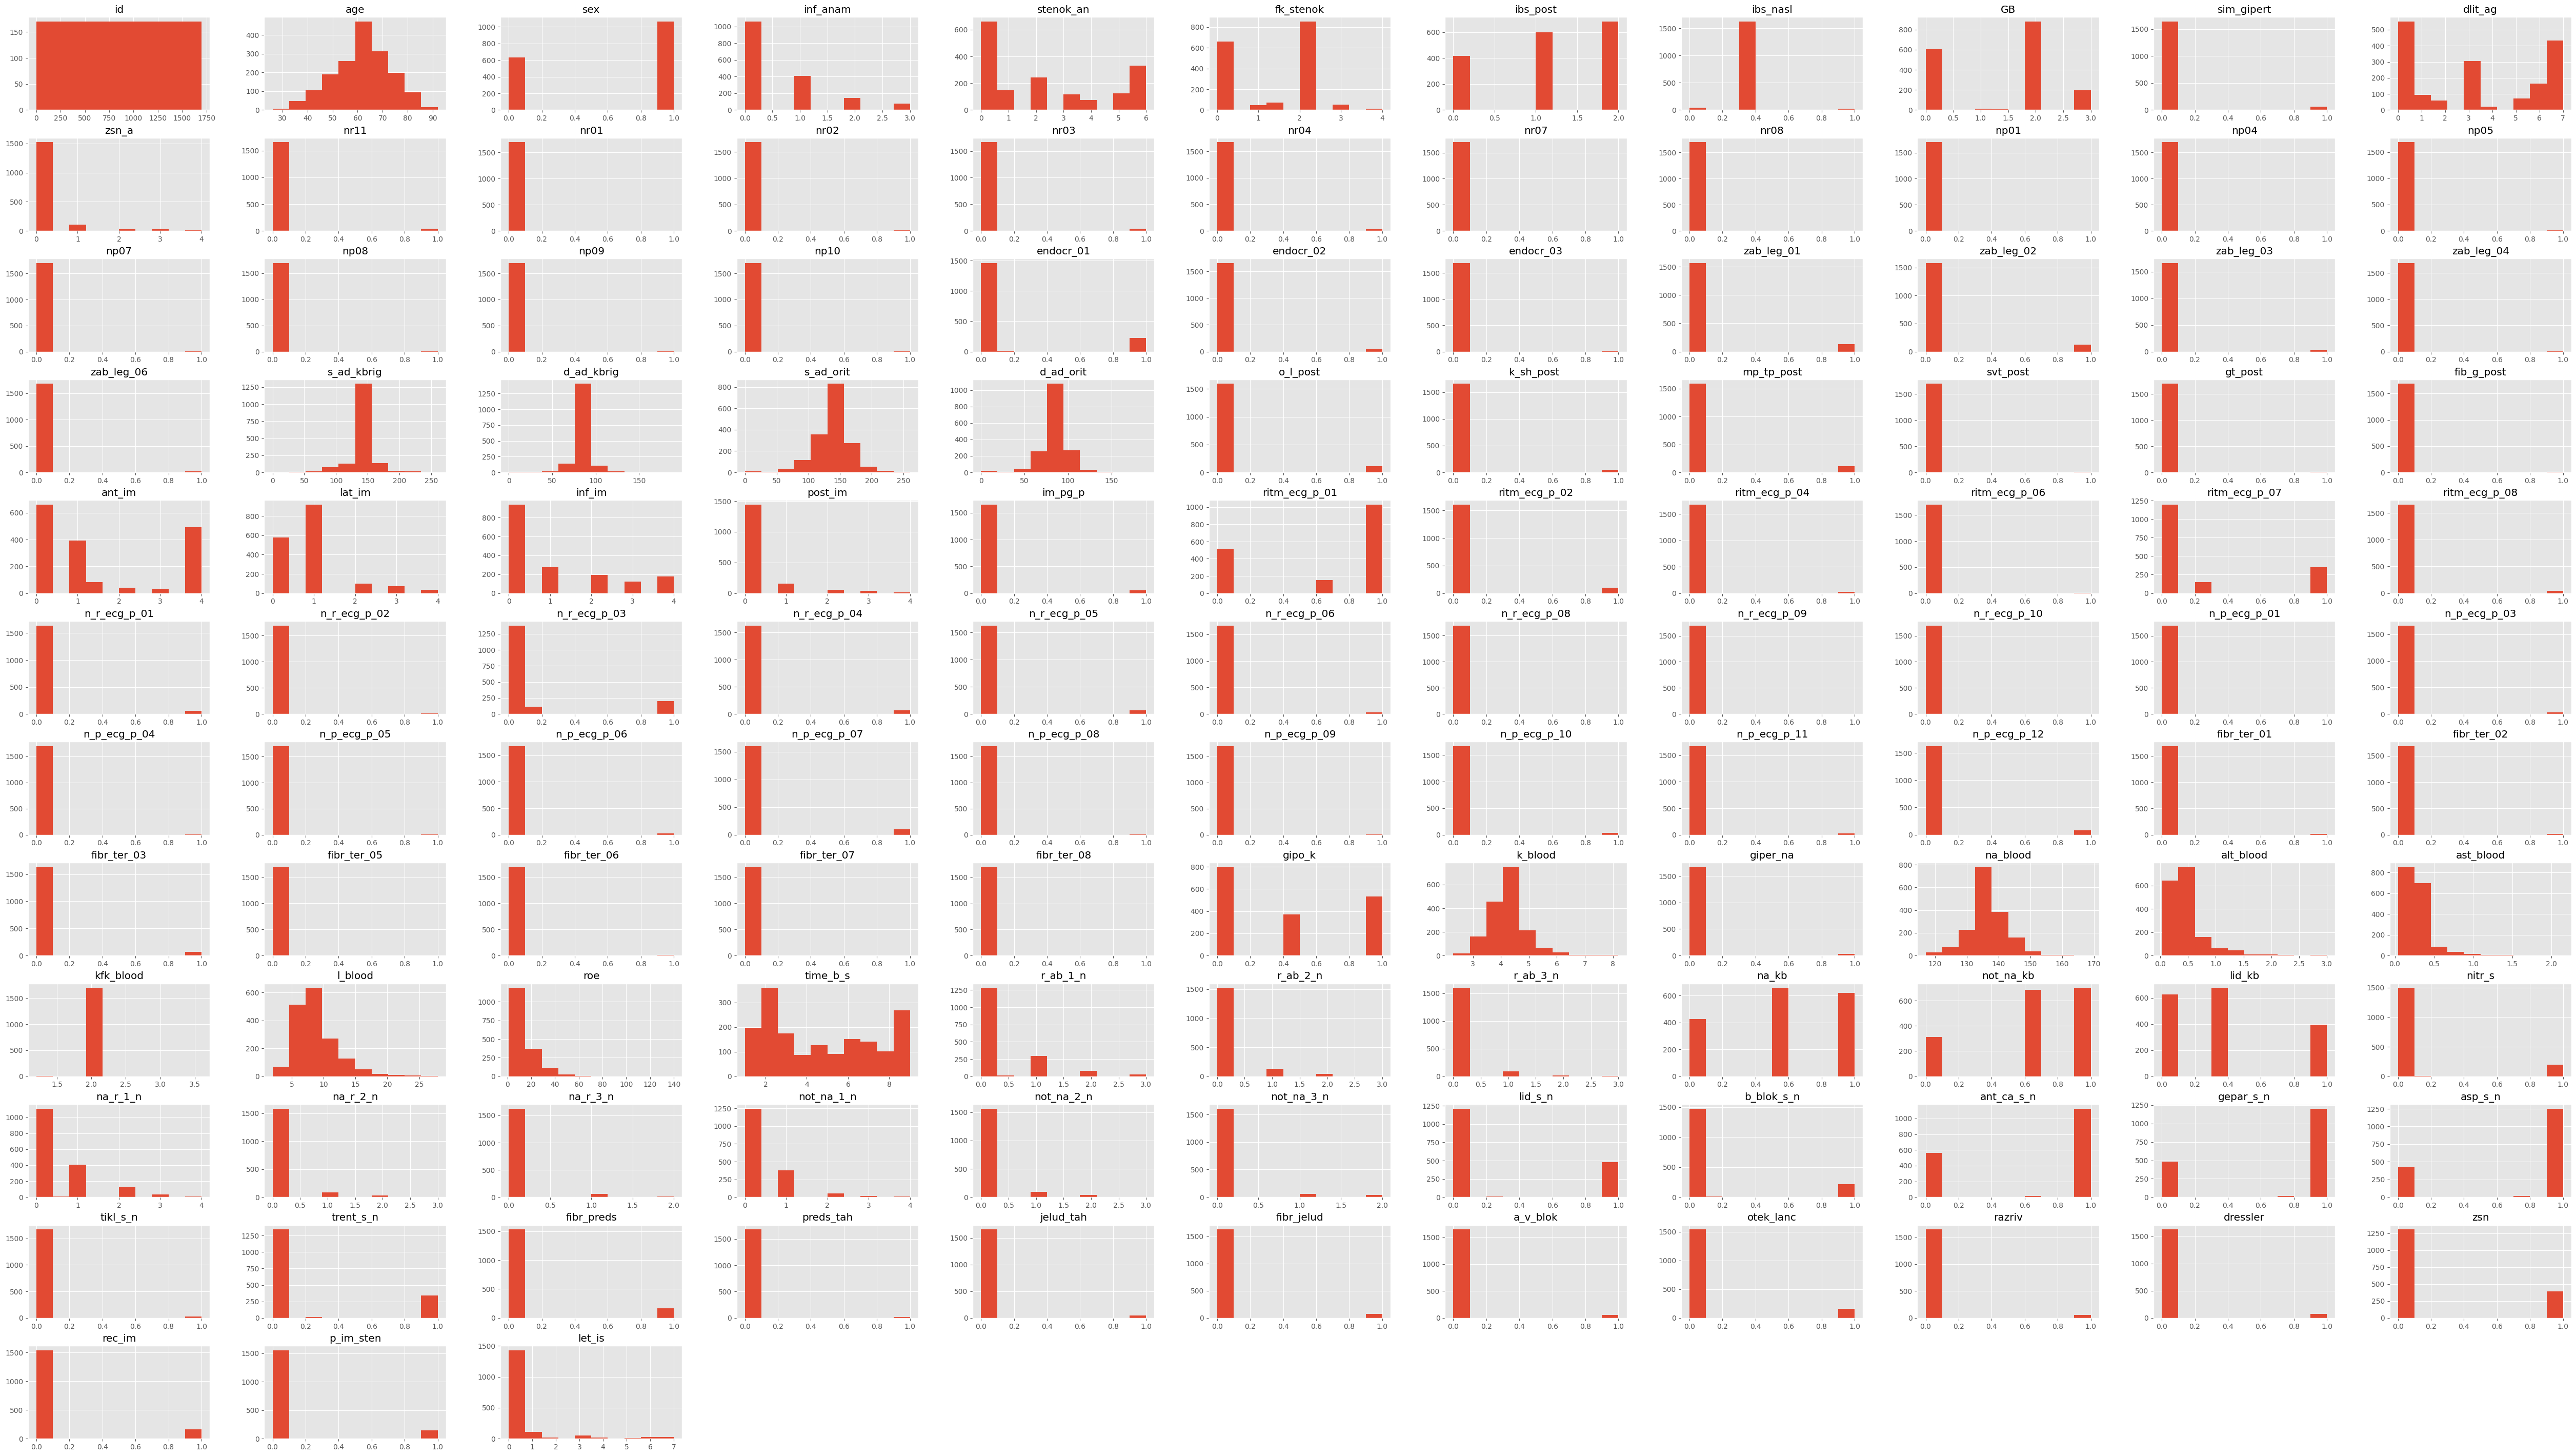

In [291]:
df_numeric = df.select_dtypes(include='number')

plt.rcParams['figure.figsize'] = (64, 36)
plt.style.use('ggplot')
df_numeric.hist()
plt.show()

In [292]:
# prueba de Agostino
normal=[]
noNormal=[]
for oe in df_numeric:
  datosColumna = df_numeric[oe]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(oe)
  else:
    noNormal.append(oe)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['id', 'age', 'sex', 'inf_anam', 'stenok_an', 'fk_stenok', 'ibs_post', 'ibs_nasl', 'GB', 'sim_gipert', 'dlit_ag', 'zsn_a', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 's_ad_kbrig', 'd_ad_kbrig', 's_ad_orit', 'd_ad_orit', 'o_l_post', 'k_sh_post ', 'mp_tp_post', 'svt_post', 'gt_post', 'fib_g_post', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'im_pg_p', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_1

**correlación de los datos**

<Axes: title={'center': 'MI Data Set'}>

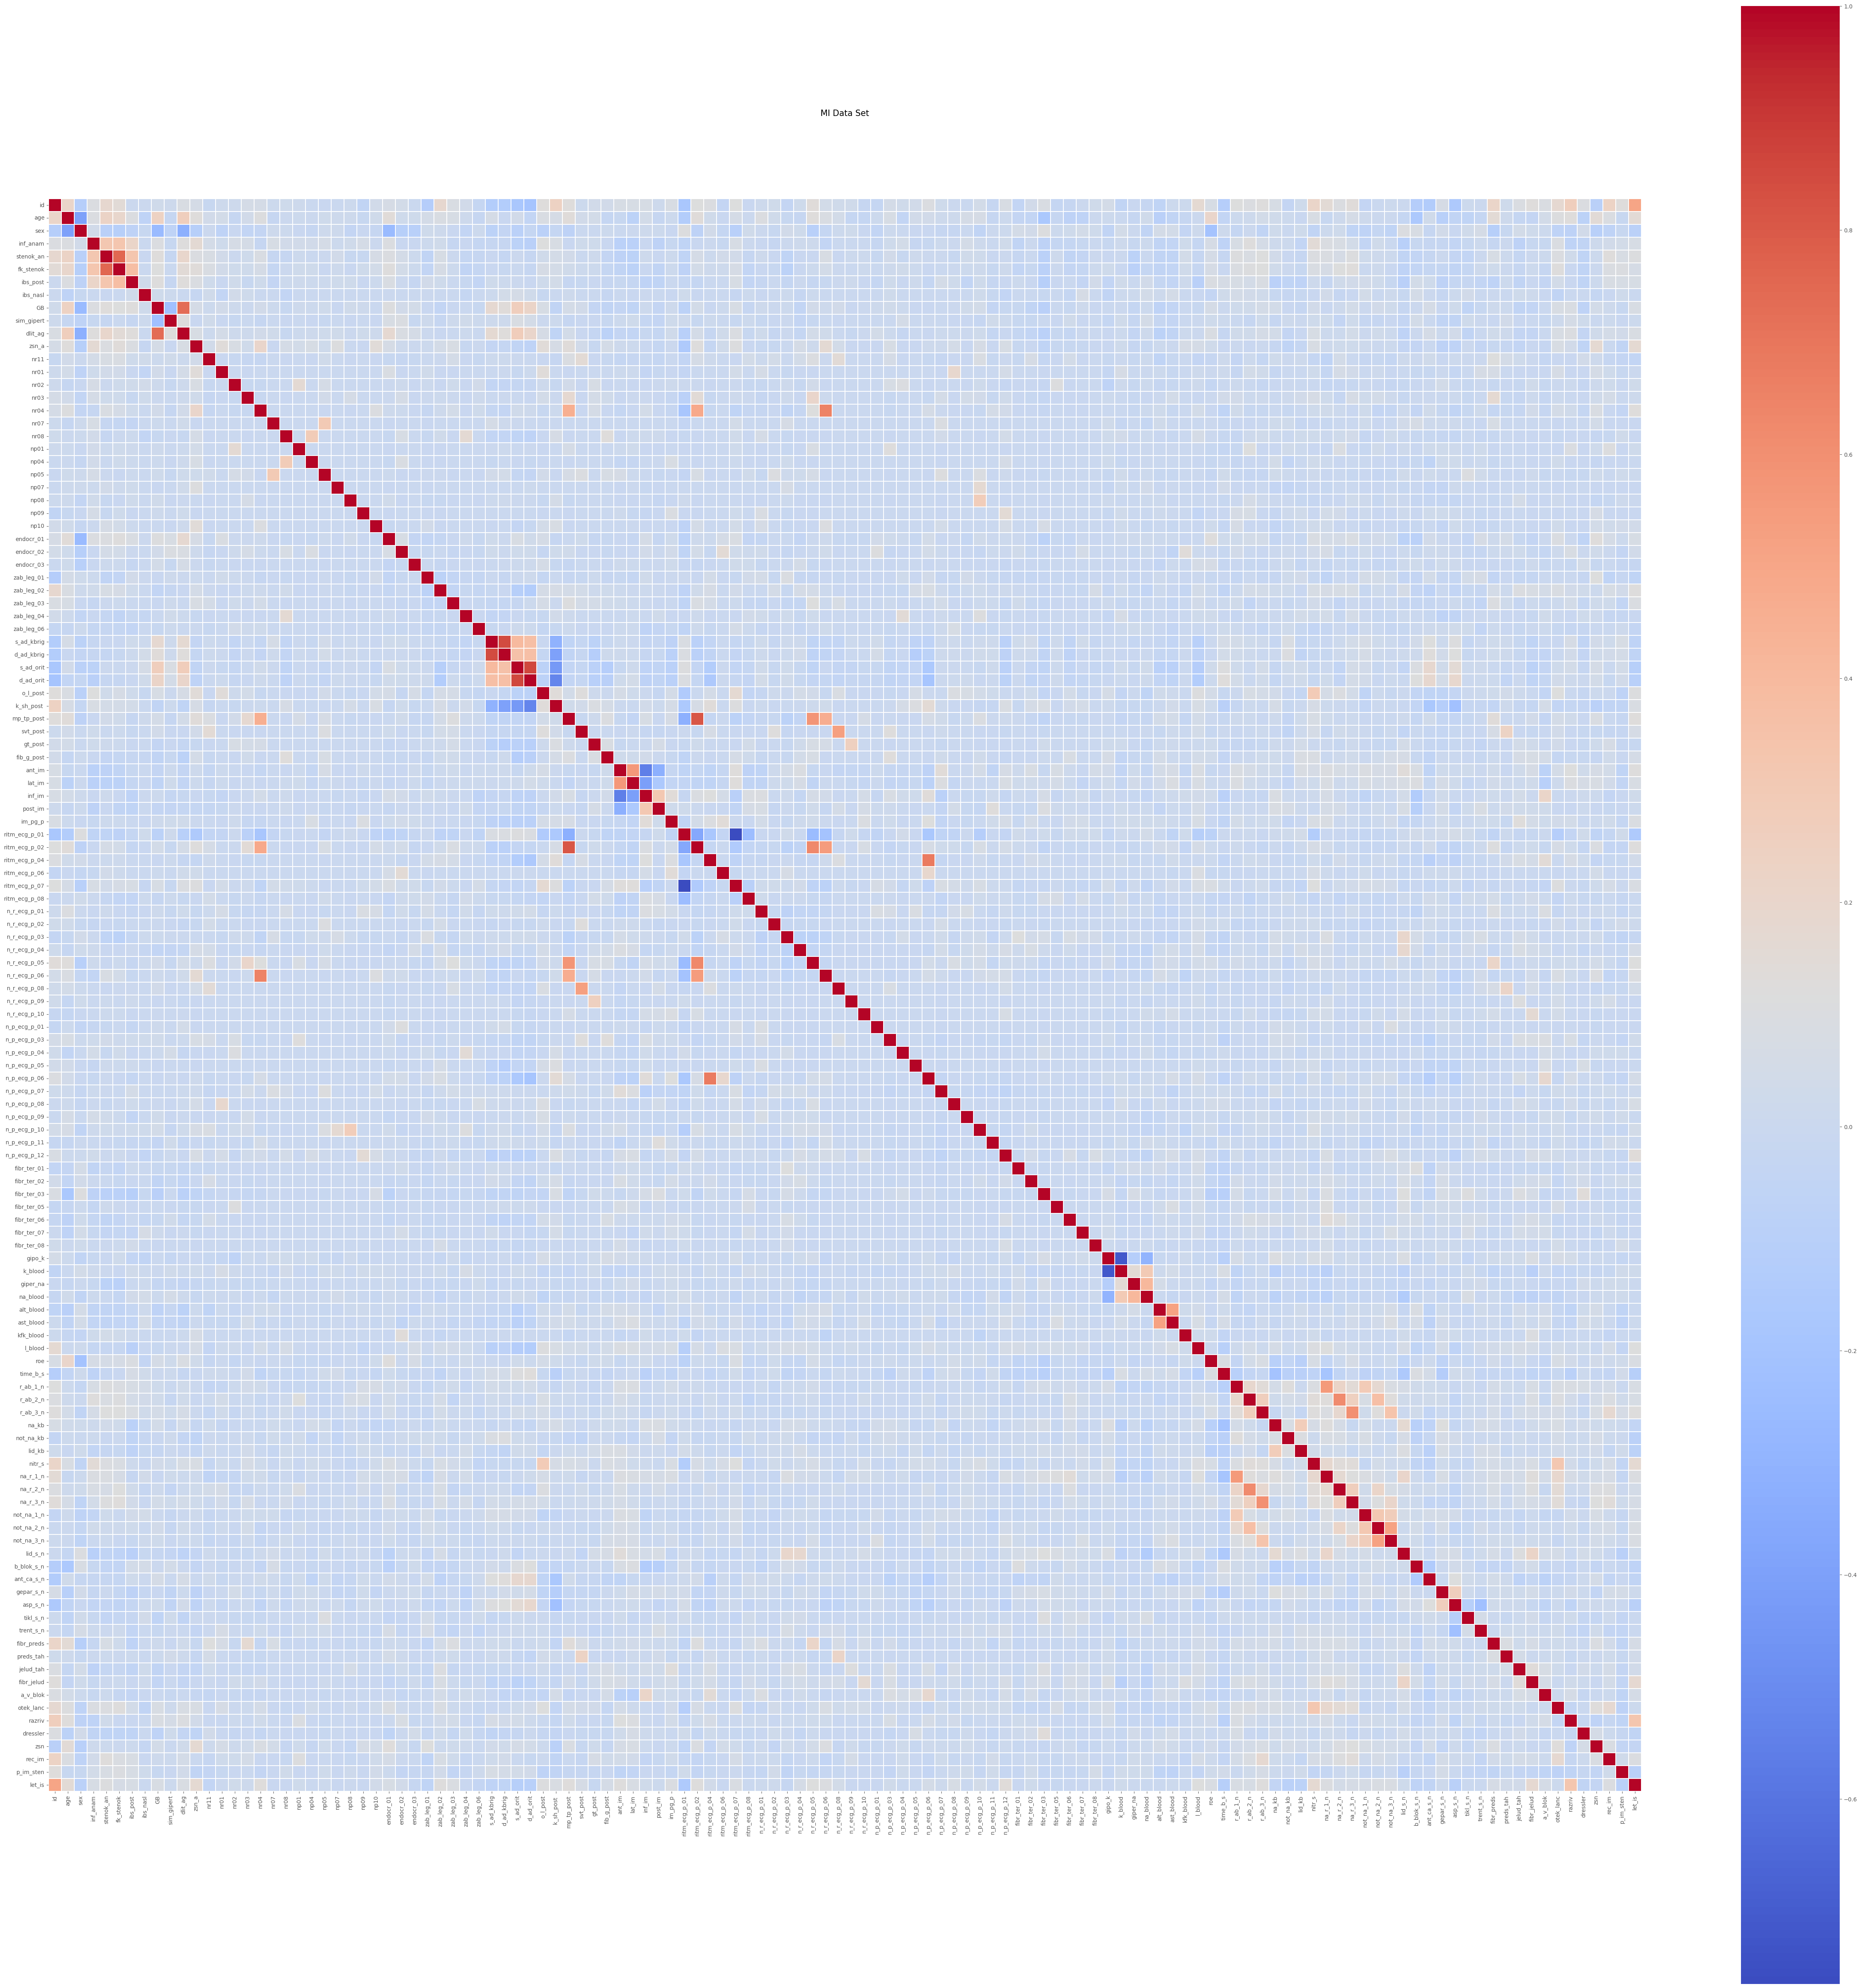

In [293]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(64,64))
plt.title('MI Data Set', y=1.05, size=15)
sb.heatmap(df_numeric.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

DEFINIR X y Y

In [294]:
X=df # obtener valores de x
y=df["let_is"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(1700, 124)
        id   age  sex  inf_anam  stenok_an  fk_stenok  ibs_post  ibs_nasl  \
0        1  77.0    1       2.0   1.000000   1.000000  2.000000     0.375   
1        2  55.0    1       1.0   0.000000   0.000000  0.000000     0.000   
2        3  52.0    1       0.0   0.000000   0.000000  2.000000     0.375   
3        4  68.0    0       0.0   0.000000   0.000000  2.000000     0.375   
4        5  60.0    1       0.0   0.000000   0.000000  2.000000     0.375   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0   4.000000   2.000000  1.000000     0.375   
1696  1697  70.0    0       0.0   6.000000   2.000000  1.000000     0.375   
1697  1698  55.0    1       3.0   6.000000   2.000000  2.000000     0.375   
1698  1699  79.0    0       2.0   2.000000   2.000000  1.000000     0.375   
1699  1700  63.0    1       2.0   2.316186   1.205286  1.160703     0.375   

       GB  sim_gipert  ...  jelud_tah  fibr_jelud  a_v_blok  ot

# 2. Algoritmo KNN

sección de partición para entrenamiento de KNN

In [295]:
XTrainKNN,XTestKNN,yTrainKNN,yTestKNN=train_test_split(X,y,test_size=0.3,random_state=6)
print("XTrain=",XTrainKNN.shape)
print("yTrain=",yTrainKNN.shape)
print("XTest=",XTestKNN.shape)
print("yTest=",yTestKNN.shape)

XTrain= (1190, 124)
yTrain= (1190,)
XTest= (510, 124)
yTest= (510,)


1.1 Implementación del modelo

In [296]:
modelo=KNeighborsClassifier(n_neighbors=2)
modelo.fit(XTrainKNN,yTrainKNN.values)

KNeighborsClassifier(n_neighbors=2)

*1.2* Predicciones



In [297]:
yPredictKnn=modelo.predict(XTestKNN)
print("Las predicciones son ")
print(yPredictKnn)
print("Se esperaba ")
print(yTestKNN.values) # para convertir la series a array de numpy
print("Accuracy=",metrics.accuracy_score(yTestKNN.values,yPredictKnn))

Las predicciones son 
[1 0 5 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 4 0 0 3 0 1 0 0 0 5 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 4 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 4 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 2 1 0 7 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 1 0 2 0 0 0 0 0 0 0 0 3 3 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 1 1 0 6 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 2 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 3 0 0 0 0 0 4 0 0 3 0 0 0 0 0 6 0 0 0 0 3 0 0 4 0 1 0 0 0 0
 0 

1.3 Métricas

[[430   2   0   0   0   0   0   0]
 [  0  15   2   8   2   0   0   0]
 [  3   2   0   1   1   0   0   1]
 [  0   7   1   5   0   0   0   0]
 [  1   2   0   4   1   1   1   0]
 [  1   1   1   0   2   0   0   0]
 [  1   0   1   2   1   1   0   0]
 [  1   4   0   2   1   0   1   0]]


<Axes: title={'center': 'MI Data Set'}>

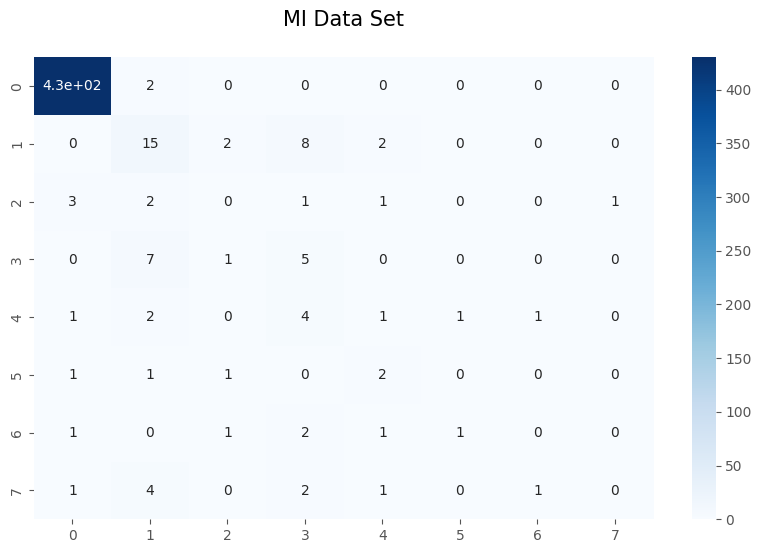

In [298]:
matriz=confusion_matrix(yTestKNN,yPredictKnn)
print(matriz)
plt.figure(figsize=(10,6))
plt.title('MI Data Set', y=1.05, size=15)
sns.heatmap(matriz,annot=True,cmap="Blues")

In [299]:
precision_recall_fscore_support(yTestKNN,yPredictKnn,average=None)
etiquetas=[
    "unknown",
    "cardiogenic shock",
    "pulmonary edema",
    "myocardial rupture",
    "progress of congestive heart failure",
    'thromboembolism',
    "asystole",
    "ventricular fibrillation"
    ]
print(classification_report(yTestKNN,yPredictKnn,target_names=etiquetas))
reportKnn = classification_report(yTestKNN,yPredictKnn,target_names=etiquetas)
accuracyKnn = modelo.score(XTestKNN,yTestKNN)
print("Accuracy=",modelo.score(XTestKNN,yTestKNN))

                                      precision    recall  f1-score   support

                             unknown       0.98      1.00      0.99       432
                   cardiogenic shock       0.45      0.56      0.50        27
                     pulmonary edema       0.00      0.00      0.00         8
                  myocardial rupture       0.23      0.38      0.29        13
progress of congestive heart failure       0.12      0.10      0.11        10
                     thromboembolism       0.00      0.00      0.00         5
                            asystole       0.00      0.00      0.00         6
            ventricular fibrillation       0.00      0.00      0.00         9

                            accuracy                           0.88       510
                           macro avg       0.22      0.25      0.24       510
                        weighted avg       0.87      0.88      0.87       510

Accuracy= 0.884313725490196


1.4 experimentos

In [300]:
distancias=["","manhattan","euclidean","minkowski"]
for k in [1,5,7,33,55,77]:  # valores arbitrarios que puede tener k
  for a in range(1,len(distancias)):
    modelo=KNeighborsClassifier(n_neighbors=k,p=a)
    modelo.fit(XTrainKNN,yTrainKNN)
    yPredict=modelo.predict(XTestKNN)
    print("Experimento k=",k," distancia =",distancias[a]," Accuracy=",metrics.accuracy_score(yTestKNN,yPredict))
  print("---------------------------------------")

Experimento k= 1  distancia = manhattan  Accuracy= 0.8901960784313725
Experimento k= 1  distancia = euclidean  Accuracy= 0.8823529411764706
Experimento k= 1  distancia = minkowski  Accuracy= 0.8823529411764706
---------------------------------------
Experimento k= 5  distancia = manhattan  Accuracy= 0.888235294117647
Experimento k= 5  distancia = euclidean  Accuracy= 0.8823529411764706
Experimento k= 5  distancia = minkowski  Accuracy= 0.8803921568627451
---------------------------------------
Experimento k= 7  distancia = manhattan  Accuracy= 0.8941176470588236
Experimento k= 7  distancia = euclidean  Accuracy= 0.888235294117647
Experimento k= 7  distancia = minkowski  Accuracy= 0.8862745098039215
---------------------------------------
Experimento k= 33  distancia = manhattan  Accuracy= 0.8960784313725491
Experimento k= 33  distancia = euclidean  Accuracy= 0.8941176470588236
Experimento k= 33  distancia = minkowski  Accuracy= 0.8921568627450981
---------------------------------------

# 3. Algoritmo NAYBAYES

In [301]:
XTrainNaive,XTestNaive,yTrainNaive,yTestNaive=train_test_split(X,y,test_size=0.3,random_state=6)
print("XTrain=",XTrainNaive.shape)
print("yTrain=",yTrainNaive.shape)
print("XTest=",XTestNaive.shape)
print("yTest=",yTestNaive.shape)

XTrain= (1190, 124)
yTrain= (1190,)
XTest= (510, 124)
yTest= (510,)


In [302]:
print(df.groupby("let_is").size()) 

let_is
0    1429
1     110
2      18
3      54
4      23
5      12
6      27
7      27
dtype: int64


2.1 preparacion del modelo

In [303]:
modeloG=GaussianNB()
modeloG.fit(XTrainNaive,yTrainNaive)
yPredictNaive=modeloG.predict(XTestNaive)
print(yPredictNaive)

[1 0 6 0 0 0 6 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 4 0 0 1 0 1 0 0 0 4 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 7 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 5 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 5 0 0 0 0 0 0 6 0 0 6 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 6 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 3 5 0 1 7 3 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 3 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 4 3 0 1 0 0 0 0 0 0 0 0 4 7 1 0 0 0 7
 0 0 0 0 0 1 7 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 7 3 0 7 0 0 0 0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 1
 0 0 3 0 0 2 6 6 0 0 0 0 0 1 0 0 3 0 0 0 0 0 4 0 0 0 0 3 0 0 4 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

2.2 Metricas

[[432   0   0   0   0   0   0   0]
 [  1  26   0   0   0   0   0   0]
 [  0   3   5   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0]
 [  0   0   0   0  10   0   0   0]
 [  0   0   0   0   2   3   0   0]
 [  0   0   0   0   0   0   6   0]
 [  0   0   0   0   0   0   1   8]]


<Axes: title={'center': 'MI Metricas'}>

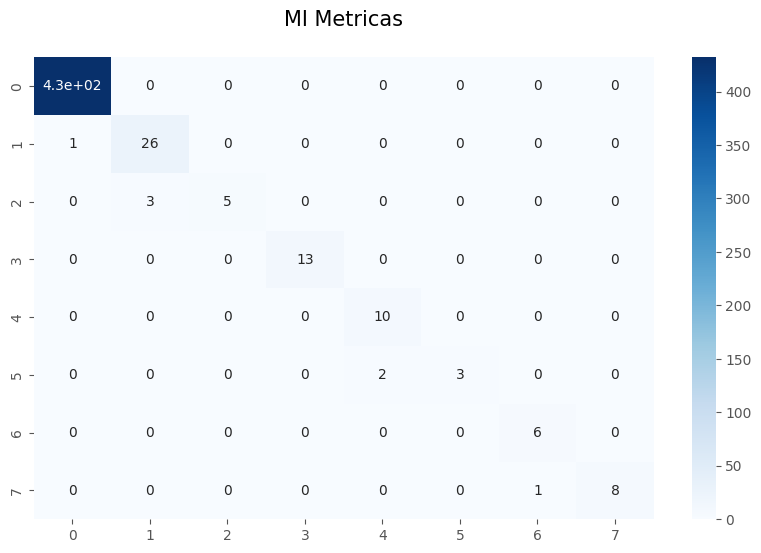

In [304]:
matrizNaive=confusion_matrix(yTestNaive,yPredictNaive)
print(matrizNaive)
plt.figure(figsize=(10,6))
plt.title('MI Metricas', y=1.05, size=15)
sns.heatmap(matrizNaive,annot=True,cmap="Blues")

2.2.2. metricas



In [305]:
precision_recall_fscore_support(yTestNaive,yPredictNaive,average=None)
etiquetas=[
    "unknown",
    "cardiogenic shock",
    "pulmonary edema",
    "myocardial rupture",
    "progress of congestive heart failure",
    'thromboembolism',
    "asystole",
    "ventricular fibrillation"
    ]
print(classification_report(yTestNaive,yPredictNaive,target_names=etiquetas))
reportNaive = classification_report(yTestNaive,yPredictNaive,target_names=etiquetas)
accuracyNaive = modeloG.score(XTestNaive,yTestNaive)
print("Accuracy=",accuracyNaive)

                                      precision    recall  f1-score   support

                             unknown       1.00      1.00      1.00       432
                   cardiogenic shock       0.90      0.96      0.93        27
                     pulmonary edema       1.00      0.62      0.77         8
                  myocardial rupture       1.00      1.00      1.00        13
progress of congestive heart failure       0.83      1.00      0.91        10
                     thromboembolism       1.00      0.60      0.75         5
                            asystole       0.86      1.00      0.92         6
            ventricular fibrillation       1.00      0.89      0.94         9

                            accuracy                           0.99       510
                           macro avg       0.95      0.88      0.90       510
                        weighted avg       0.99      0.99      0.99       510

Accuracy= 0.9862745098039216


# 4. Arboles de decisión

In [306]:
caracteristicas=list(df)
print(caracteristicas)
XArbol=df
yArbol=df["let_is"]
caracteristicas=list(XArbol)
print(caracteristicas)
print(XArbol)

['id', 'age', 'sex', 'inf_anam', 'stenok_an', 'fk_stenok', 'ibs_post', 'ibs_nasl', 'GB', 'sim_gipert', 'dlit_ag', 'zsn_a', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 's_ad_kbrig', 'd_ad_kbrig', 's_ad_orit', 'd_ad_orit', 'o_l_post', 'k_sh_post ', 'mp_tp_post', 'svt_post', 'gt_post', 'fib_g_post', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'im_pg_p', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_

In [307]:
XTrainArbol,XTestArbol,yTrainArbol,yTestArbol=train_test_split(X,y,test_size=0.2,random_state=5)

Implementación árbol de Decisión

In [308]:
modeloArbol=DecisionTreeClassifier(max_depth=4)
modeloArbol.fit(XTrainArbol,yTrainArbol)
yPredictArbol=modeloArbol.predict(XTrainArbol)
print("Train Accuracy ",metrics.accuracy_score(yTrainArbol,yPredictArbol))

yPredictArbol=modeloArbol.predict(XTestArbol)
print("Test Accuracy ",metrics.accuracy_score(yTestArbol,yPredictArbol))

Train Accuracy  0.9720588235294118
Test Accuracy  0.9558823529411765


Matriz de confusión

[[277   0   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0]
 [  0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   6   0]
 [  0   0   0   0   0   0   5   0]
 [  0   0   0   0   0   0   5   0]
 [  0   0   0   0   0   0   0   6]]


<Axes: title={'center': 'MI Metricas'}>

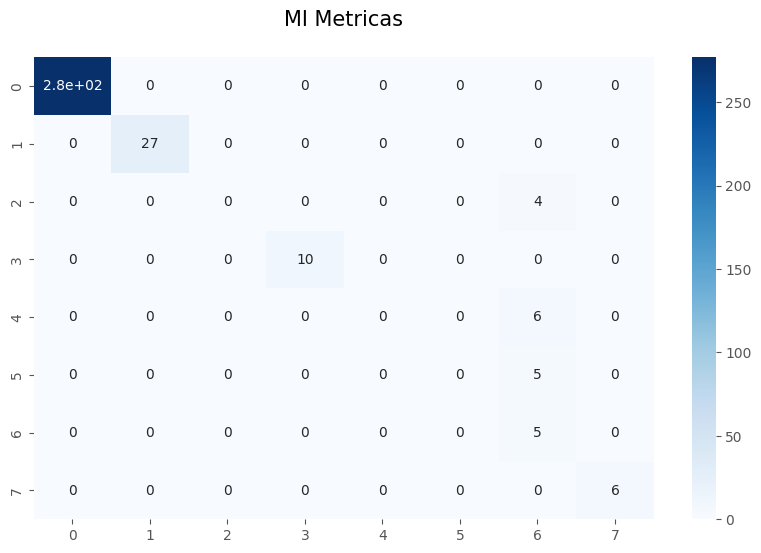

In [309]:
matrizArbol =confusion_matrix(yTestArbol,yPredictArbol)
print(matrizArbol)
plt.figure(figsize=(10,6))
plt.title('MI Metricas', y=1.05, size=15)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

Metricas

In [310]:
precision_recall_fscore_support(yTestArbol,yPredictArbol,average=None)
etiquetas=[
    "unknown",
    "cardiogenic shock",
    "pulmonary edema",
    "myocardial rupture",
    "progress of congestive heart failure",
    'thromboembolism',
    "asystole",
    "ventricular fibrillation"
]
print(classification_report(yTestArbol,yPredictArbol,target_names=etiquetas))
reportArbol = classification_report(yTestArbol,yPredictArbol,target_names=etiquetas)
accuracyArbol = modeloArbol.score(XTestArbol,yTestArbol)

                                      precision    recall  f1-score   support

                             unknown       1.00      1.00      1.00       277
                   cardiogenic shock       1.00      1.00      1.00        27
                     pulmonary edema       0.00      0.00      0.00         4
                  myocardial rupture       1.00      1.00      1.00        10
progress of congestive heart failure       0.00      0.00      0.00         6
                     thromboembolism       0.00      0.00      0.00         5
                            asystole       0.25      1.00      0.40         5
            ventricular fibrillation       1.00      1.00      1.00         6

                            accuracy                           0.96       340
                           macro avg       0.53      0.62      0.55       340
                        weighted avg       0.94      0.96      0.95       340



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [311]:
export_graphviz(modeloArbol,out_file="arbol.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)

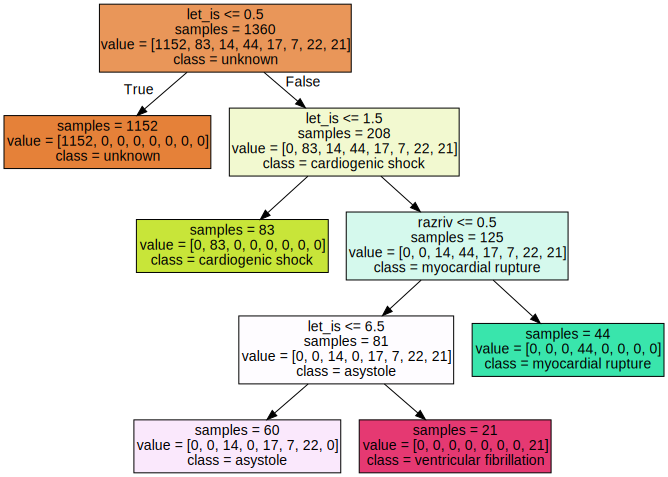

In [312]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

124


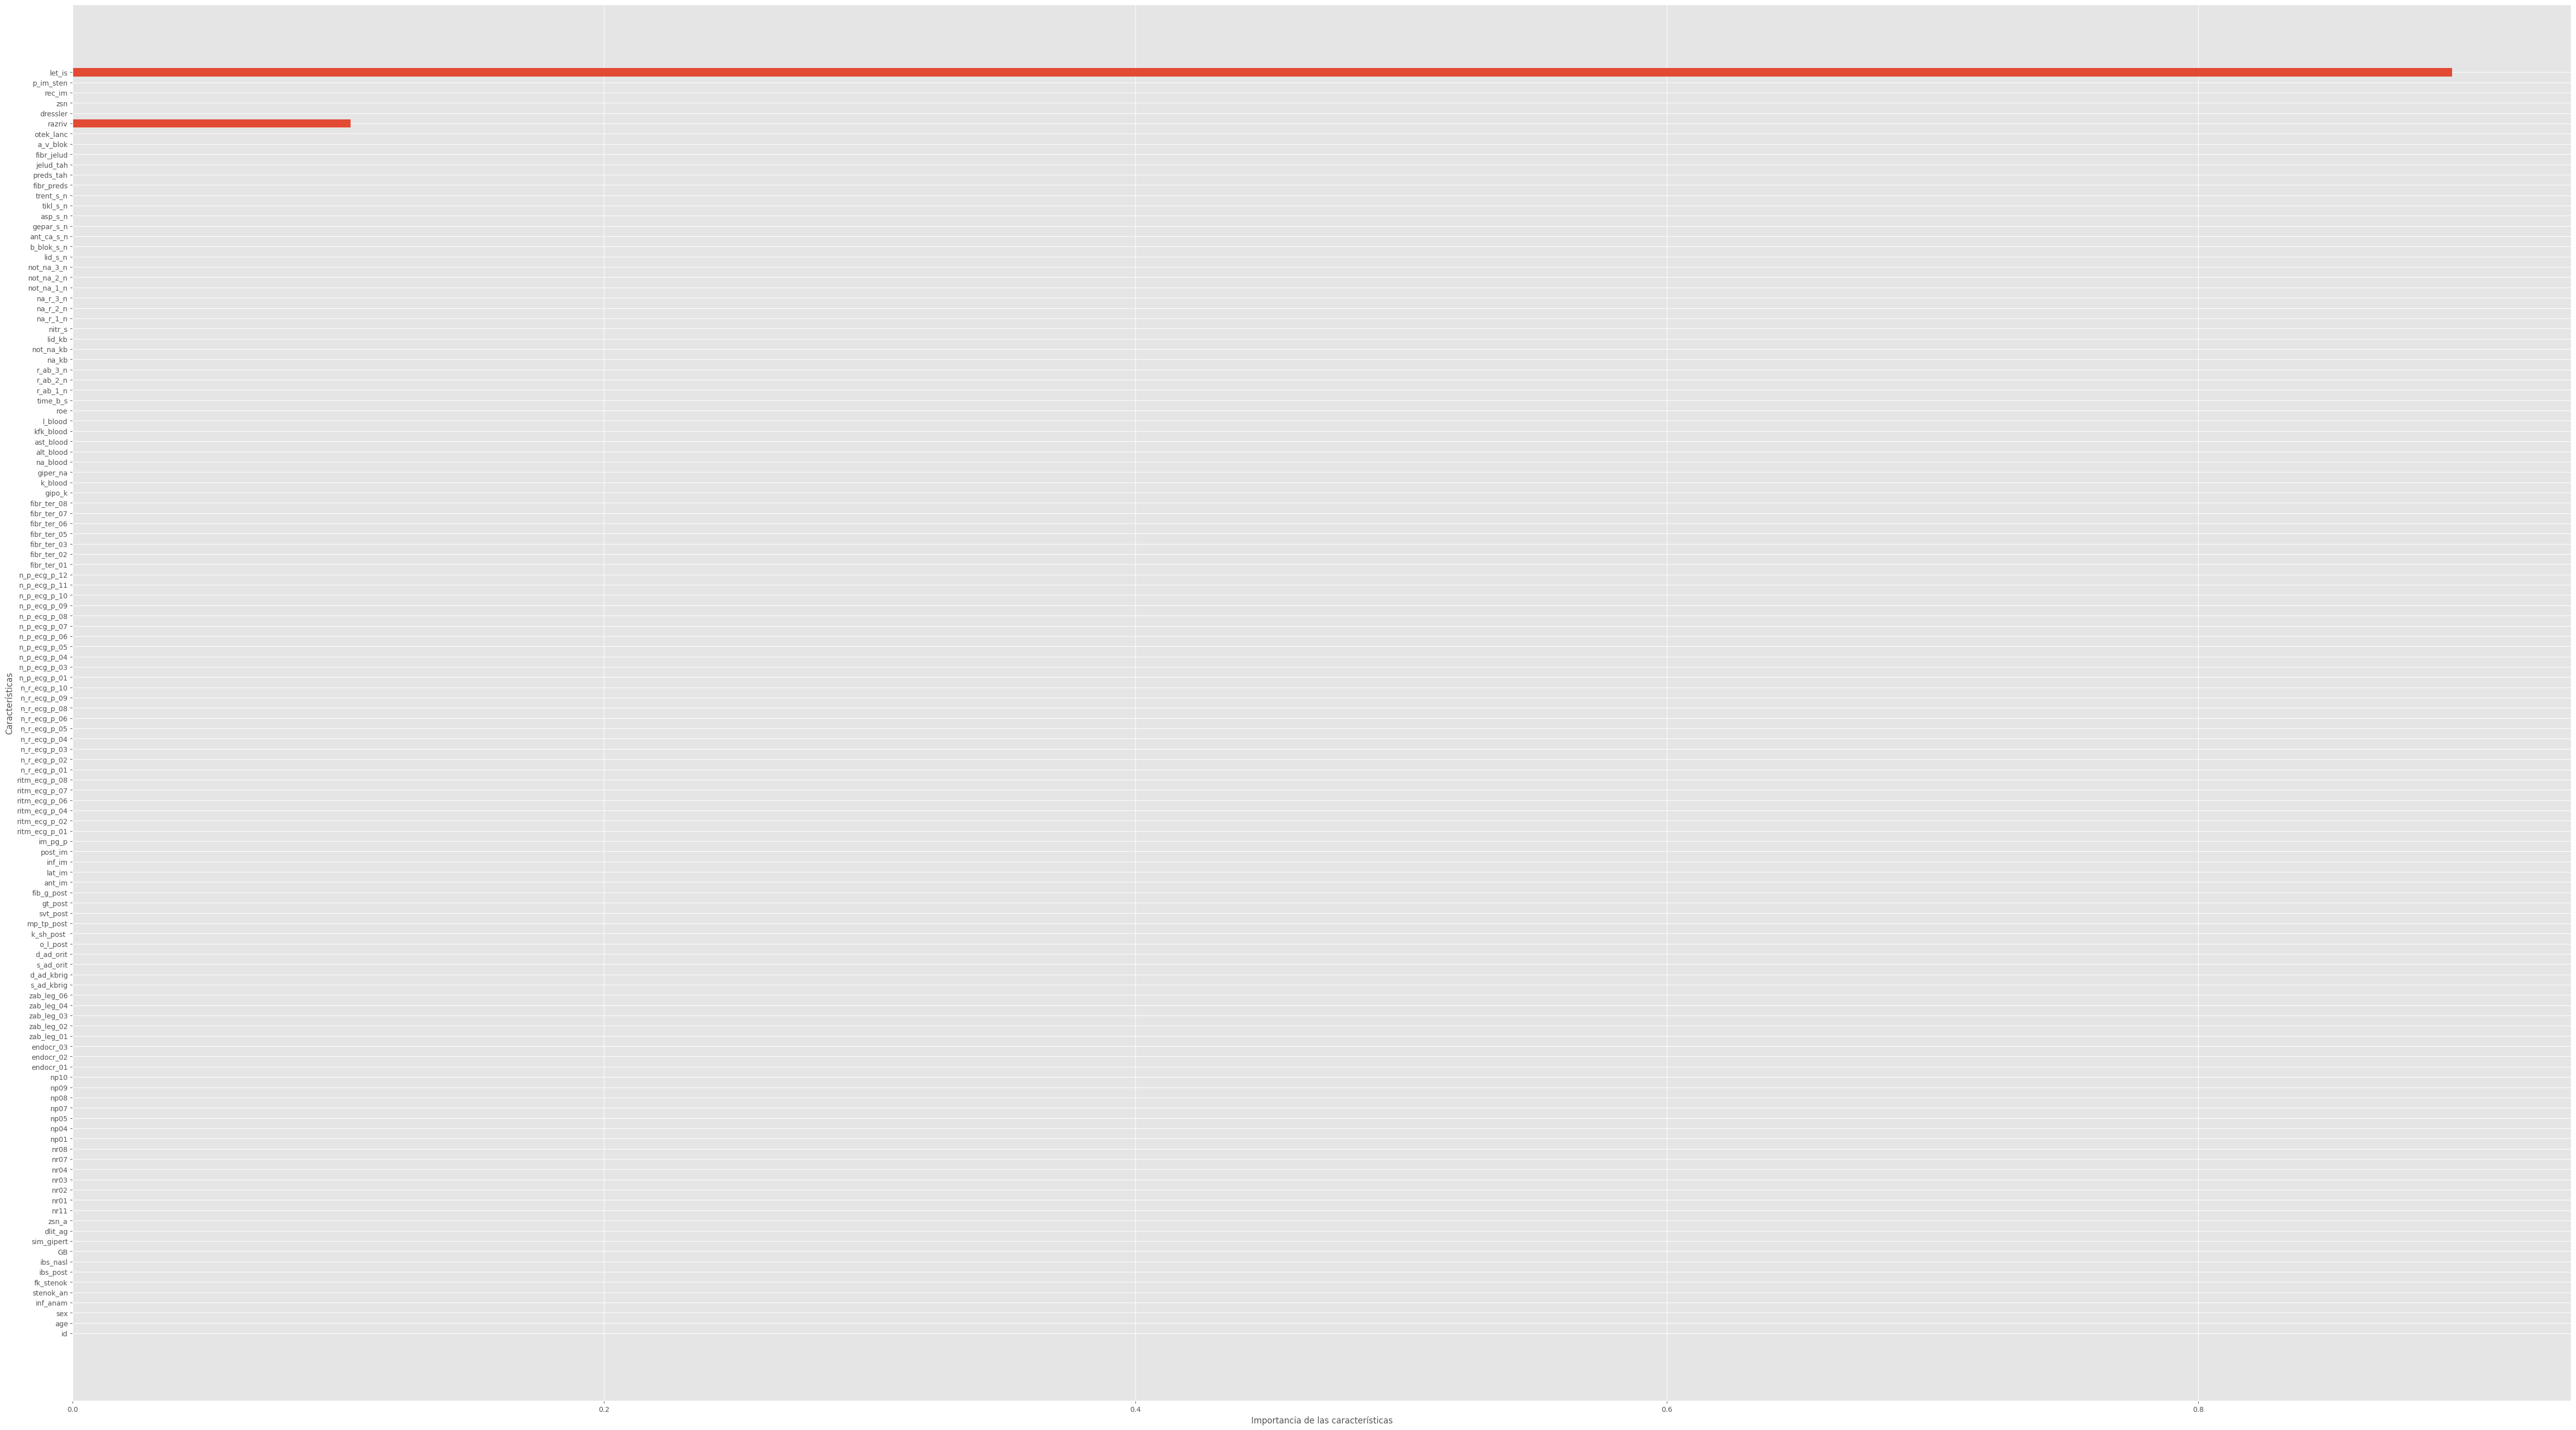

In [313]:
numeroCaracteristicas=XArbol.shape[1]
print(numeroCaracteristicas)
plt.barh(range(numeroCaracteristicas),modeloArbol.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

validacion cruzada


In [314]:
scores = cross_val_score(modeloArbol, XArbol, yArbol, cv=5,scoring='f1')    # cv= 4 partes para entrenar y una para probar
print(scores)  # puntajes de los entrenamientos   -- para mejorar se puede ajustar la altura del árbol
print(scores.mean())

[nan nan nan nan nan]
nan


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labe

# 5. Algoritmo de maquinas de soporte vectorial

In [315]:
XTrainMaquina, XTestMaquina, yTrainMaquina, yTestMaquina=train_test_split(X,y,test_size=0.2,random_state=6)

modeloSVC=SVC()
modeloSVC.fit(XTrainMaquina,yTrainMaquina)
yPredictSVC=modelo.predict(XTestMaquina) # Entrenamiento
accuracySVC = metrics.accuracy_score(yTestMaquina,yPredictSVC)
print("Accruracy=",metrics.accuracy_score(yTestMaquina,yPredictSVC)) # como el dataset está balanceado entonces se puede creer al accuracy

Accruracy= 0.8970588235294118


In [316]:
escaladorM=MinMaxScaler()

XTrainMaquina=escaladorM.fit_transform(XTrainMaquina)
print(XTrainMaquina)

XTestMaquina=escaladorM.transform(XTestMaquina)
print("---")
print(XTestMaquina)

[[0.32273263 0.68181818 0.         ... 0.         0.         0.        ]
 [0.82862191 0.59090909 0.         ... 0.         1.         0.        ]
 [0.303298   0.75757576 0.         ... 0.         0.         0.        ]
 ...
 [0.13368669 0.46969697 0.         ... 0.         0.         0.        ]
 [0.41990577 0.42424242 1.         ... 0.         0.         0.        ]
 [0.5335689  0.31818182 1.         ... 0.         0.         0.        ]]
---
[[0.89222615 0.56060606 1.         ... 1.         0.         0.14285714]
 [0.67432273 0.43939394 0.         ... 1.         1.         0.        ]
 [0.95995289 0.37878788 1.         ... 0.         0.         0.85714286]
 ...
 [0.00706714 0.51515152 1.         ... 0.         0.         0.        ]
 [0.96760895 0.56060606 0.         ... 0.         0.         0.14285714]
 [0.21378092 0.92424242 0.         ... 0.         0.         0.        ]]


[[285   2   0   0   0   0   0   0]
 [  0  20   0   0   0   0   0   0]
 [  1   3   0   1   0   0   0   0]
 [  2   6   0   0   0   0   0   0]
 [  1   3   0   2   0   0   0   0]
 [  1   3   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0]]


<Axes: title={'center': 'MI Metricas'}>

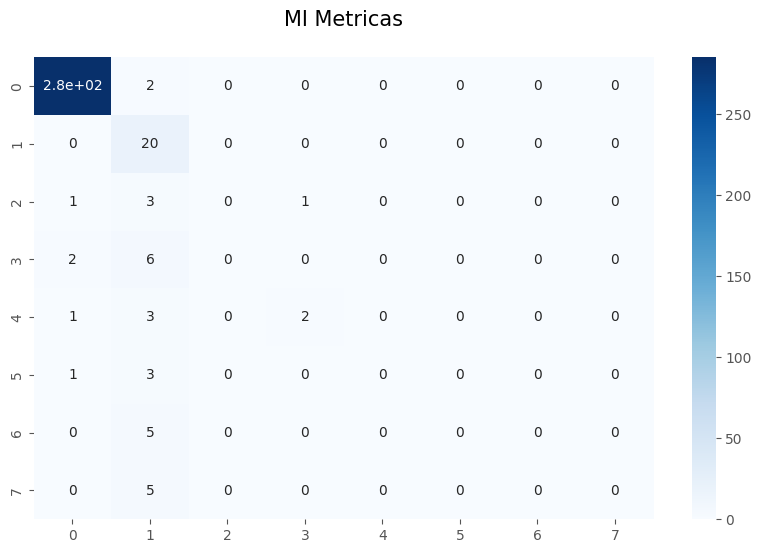

In [317]:
matrizSVC =confusion_matrix(yTestMaquina,yPredictSVC)
print(matrizSVC)
plt.figure(figsize=(10,6))
plt.title('MI Metricas', y=1.05, size=15)
sb.heatmap(matrizSVC,annot=True,cmap="Blues")

In [318]:
precision_recall_fscore_support(yTestMaquina,yPredictSVC,average=None)
etiquetas=[
    "unknown",
    "cardiogenic shock",
    "pulmonary edema",
    "myocardial rupture",
    "progress of congestive heart failure",
    'thromboembolism',
    "asystole",
    "ventricular fibrillation"
    ]
print(classification_report(yTestMaquina,yPredictSVC,target_names=etiquetas))
reportArbol = classification_report(yTestMaquina,yPredictSVC,target_names=etiquetas)

                                      precision    recall  f1-score   support

                             unknown       0.98      0.99      0.99       287
                   cardiogenic shock       0.43      1.00      0.60        20
                     pulmonary edema       0.00      0.00      0.00         5
                  myocardial rupture       0.00      0.00      0.00         8
progress of congestive heart failure       0.00      0.00      0.00         6
                     thromboembolism       0.00      0.00      0.00         4
                            asystole       0.00      0.00      0.00         5
            ventricular fibrillation       0.00      0.00      0.00         5

                            accuracy                           0.90       340
                           macro avg       0.18      0.25      0.20       340
                        weighted avg       0.85      0.90      0.87       340



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

# 1 regresion lineal

In [319]:
feature = np.array(df['let_is'])
feature = feature.reshape(-1, 1)
print(feature)

[[0]
 [0]
 [0]
 ...
 [6]
 [1]
 [1]]


entrenamiento del modelo

In [320]:
regresionLineal=LinearRegression()
regresionLineal.fit(feature,y)
w=regresionLineal.coef_
b=regresionLineal.intercept_
print("W=",w)
print("b=",b)

W= [1.]
b= -3.3306690738754696e-16


predición

In [321]:
nuevaConsulta=np.array([[3]])
prediccion=regresionLineal.predict(nuevaConsulta) # da el valor de la predicció  para el valor 6 de X
print(prediccion)

[3.]


coeficiente de determinación

In [322]:
r2=regresionLineal.score(feature,y)
print("R2=",r2)

R2= 1.0


In [323]:
from sklearn.metrics import mean_squared_error

prediccionEntrenamiento=regresionLineal.predict(feature)
mse=mean_squared_error(y_true = y, y_pred = prediccionEntrenamiento)
print("MSE=",mse)
rmse=np.sqrt(mse)
print("RMSE=",rmse)

MSE= 8.695813873701434e-31
RMSE= 9.325134783852422e-16
